# US Govt Fair Use Index Review

## Install Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read US Govt Fair Use Index excel file

Read the excel data into a Pandas dataframe:

> Manually copied on February 24th, 2025 from https://www.copyright.gov/fair-use/index.html

In [2]:
df = pd.read_excel('./USGOVT_FairUseIndex_02-24-2025.xlsx')

### Run some assertions for data valization and quality assurance

- using `isna()` to check for missing values in the dataset

In [5]:
# Make sure there are no missing rows or values from data file
assert(df[df.Case.isna()].shape == (0, df.columns.size))
assert(df[df.Year.isna()].shape == (0, df.columns.size))
assert(df[df.Court.isna()].shape == (0, df.columns.size))
assert(df[df.Jurisdiction.isna()].shape == (0, df.columns.size))
assert(df[df.Categories.isna()].shape == (0, df.columns.size))
assert(df[df.Outcome.isna()].shape == (0, df.columns.size))

_______________

## Data Visualizations

- First we review **Outcomes** of the Fair Use Index, as there are many unique values

Text(0.5, 1.0, 'Fair Use Case Index Outcomes (Totals)')

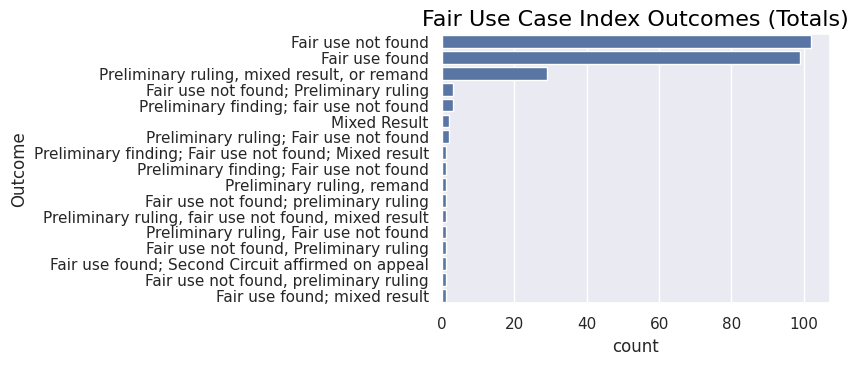

In [16]:
#df['Outcome'].value_counts(ascending=True).plot(kind='barh', figsize=(5,3), label='Outcome')
# seaborn plot sorted by value count of df.Outcome
sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Outcomes (Totals)'
sns.countplot(data=df, y='Outcome', order=df['Outcome'].value_counts().index).set_title(title, fontsize=16, color='black')

<Axes: ylabel='Court'>

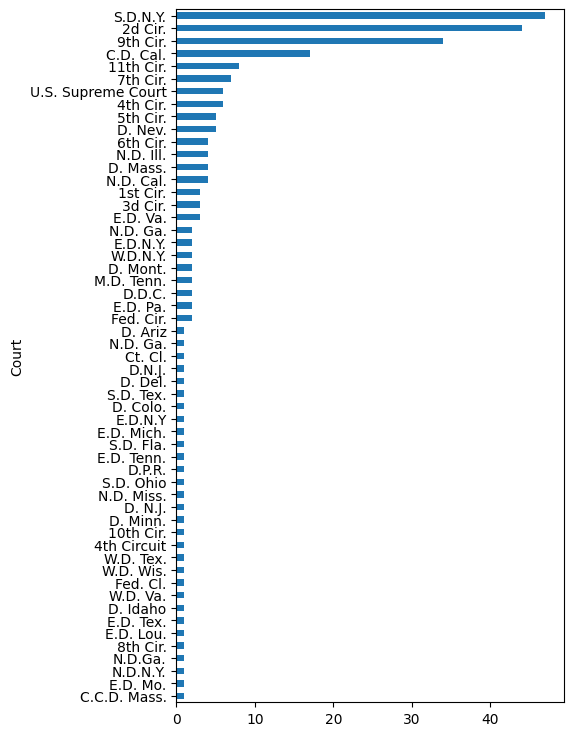

In [6]:
df['Court'].value_counts(ascending=True).plot(kind='barh', figsize=(5,9), label='Court')

## Filtering on Date Ranges

- helpful to look at the data across decades for trends

> Notably there is one outlier case in 1840s that we exclude from analysis

In [8]:
# Cleaning up the year column for inconsistent integer values
df['Year'] = df['Year'].replace('2017, affirmed 2018', '2018')

In [9]:
# Set Year as integer values
df['Year'] = df['Year'].astype(int)

Text(0.5, 1.0, 'Number of Fair Use Case Index Refs per Year (1950-2025)')

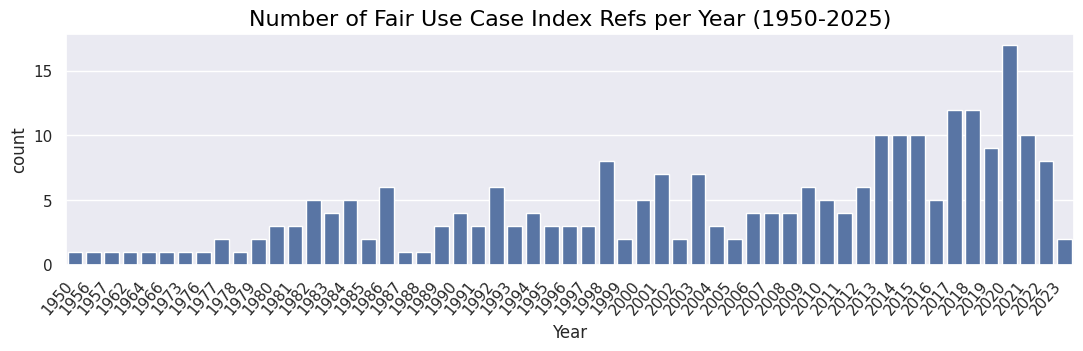

In [10]:
# Bar plot of the number of cases per year
#df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,2.5), label='Year')
# seaborn bar plot of the number of cases per year

title='Number of Fair Use Case Index Refs per Year (1950-2025)'
sns.set(rc={'figure.figsize':(13,3)})
sns.set_style("darkgrid")
plt.xticks(rotation=50, ha='right')
sns.countplot(data=df[df['Year'] >= 1950], x='Year').set_title(title, fontsize=16, color='black')


Text(0.5, 1.0, 'Number of Fair Use Case Index Refs per Year (ignoring years before (1950-2025)')

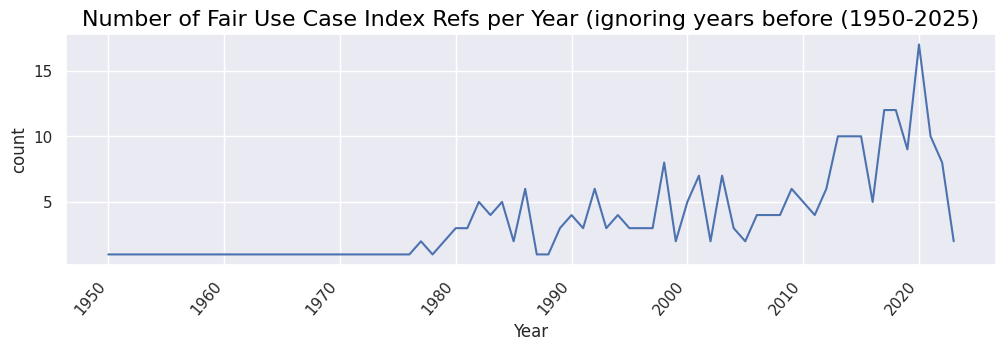

In [12]:
# Bar plot of the number of cases per year
#df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,2.5), label='Year')
# seaborn bar plot of the number of cases per year

title='Number of Fair Use Case Index Refs per Year (ignoring years before (1950-2025)'
sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("darkgrid")
plt.xticks(rotation=50, ha='right')
#sns.countplot(data=df[df['Year'] >= 1950], x='Year').set_title(title, fontsize=16, color='black')
# instead of a countplot, do a line plot
sns.lineplot(data=df[df['Year'] >= 1950]['Year'].value_counts().sort_index()).set_title(title, fontsize=16, color='black')

### Filtering on Decades

In [13]:
# Set a new column as Decades column
df['Decade'] = (df['Year'] // 10) * 10
# fill in missing decades with 0, so take the lowest value as the first decade, then increment by 10 for each decade
df['Decade'] = df['Decade'].fillna(0).astype(int)
# filling in missing decades
decades_over_time = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

Text(0.5, 1.0, '# of Fair Use Cases Index Refs per Decade')

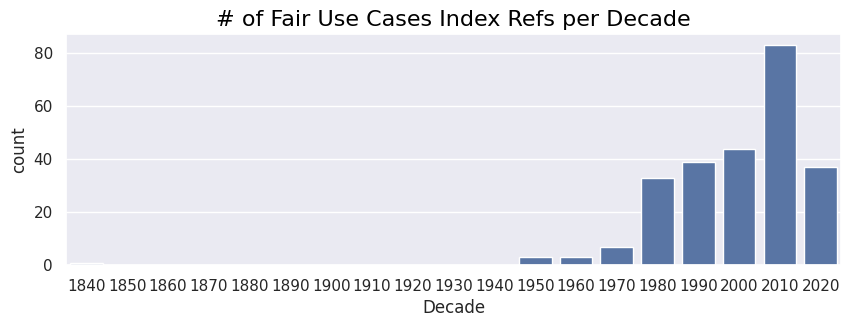

In [14]:
# Bar plot of the number of cases per decade (including missing values)
#df.Decade.value_counts().reindex(decades_over_time).plot(kind='bar', figsize=(10,2.5), label='Decade')

sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("darkgrid")
title='# of Fair Use Cases Index Refs per Decade'
sns.countplot(x='Decade', data=df, order=decades_over_time).set_title(title, fontsize=16, color='black')



Text(0.5, 1.0, '# of Fair Use Cases Index Refs per Decade (Condensed)')

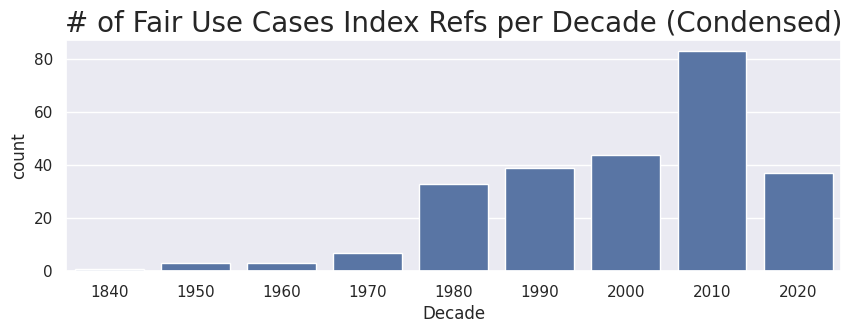

In [15]:
# Plot the number of cases per decade
#df['Decade'].value_counts().sort_index().plot(kind='bar', figsize=(5,3), label='Decade')
# seaborn
# Bar plot of the number of cases per decade (including missing values)
#df.Decade.value_counts().reindex(decades_over_time).plot(kind='bar', figsize=(10,2.5), label='Decade')
# seaborn sort on reindexed decades_over_time, make it wider, and add a title
# change degree of x axis labels
sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("darkgrid")
sns.countplot(x='Decade', data=df).set_title('# of Fair Use Cases Index Refs per Decade (Condensed)', fontsize=20)



### Filtering on Outcomes for Summary Statistics

In [20]:
# Assertion for sanity checking that all values are accounted for in three main categories
fair_use_total = df[df.Outcome.str.contains('FAIR USE FOUND', case=False)].shape[0]
fair_not_total = df[df.Outcome.str.contains('FAIR USE NOT FOUND', case=False)].shape[0]
fair_alt_total = df[ ~ df['Outcome'].str.contains('FAIR USE', case=False)].shape[0] 
assert(fair_use_total + fair_not_total + fair_alt_total == df.shape[0])

In [21]:
main_outcomes = ['FAIR USE FOUND', 'FAIR USE NOT FOUND', 'OTHER']
# Create a new column called 'Main Outcome' that contains only the main outcomes
df['Main Outcome'] = df['Outcome'].str.upper().apply(lambda x: 'FAIR USE FOUND' if 'FAIR USE FOUND' in x else ('FAIR USE NOT FOUND' if 'FAIR USE NOT FOUND' in x else 'OTHER'))


Text(0.5, 1.0, 'Fair Use Case Index Outcomes (Main Categories Summary)')

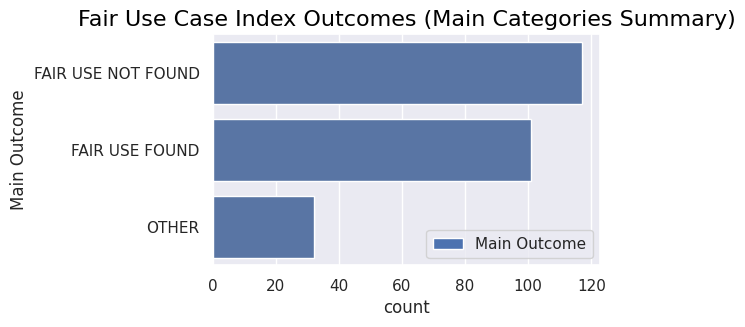

In [22]:
# Bar plot of the number of cases per main outcome
df['Main Outcome'].value_counts().plot(kind='barh', figsize=(5,3), label='Main Outcome')
# make this look better with seaborn plot
title='Fair Use Case Index Outcomes (Main Categories Summary)'
sns.countplot(y='Main Outcome', data=df).set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs each Decade per Main Outcomes (1950-2025)')

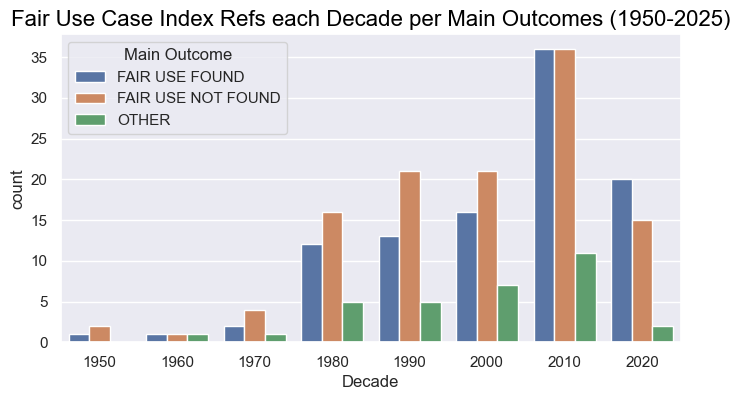

In [ ]:
# sns plot on year value counts with hue as Main Outcome
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes (1950-2025)'
#sns.lineplot(data=df[df['Year'] >= 1950]['Year'].value_counts().sort_index()).set_title(title, fontsize=16, color='black')
sns.countplot(x='Decade', data=df[df['Year'] >= 1950], hue='Main Outcome').set_title(title, fontsize=16, color='black')
# convert that to a line plot with hue as Main Outcome
#sns.lineplot(data=df, x='Decade', y='Count', hue='Main Outcome').set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs each Decade per Main Outcomes')

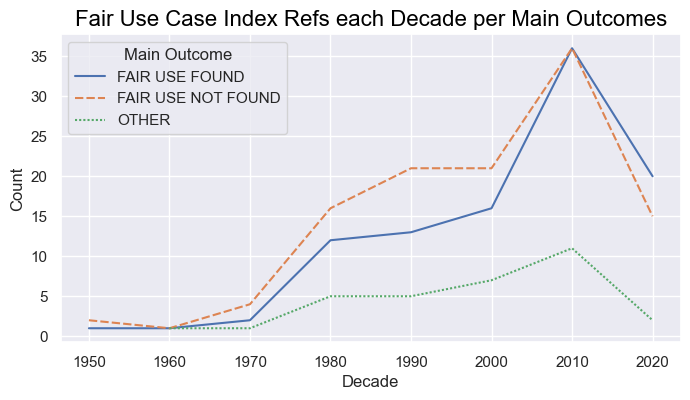

In [75]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Decade', 'Main Outcome']).size().reset_index(name='Count')
# filter for 1950 and later
df_counts = df_counts[df_counts['Decade'] >= 1950]
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes'
sns.lineplot(data=df_counts, x='Decade', y='Count', hue='Main Outcome', style='Main Outcome').set_title(title, fontsize=16, color='black')

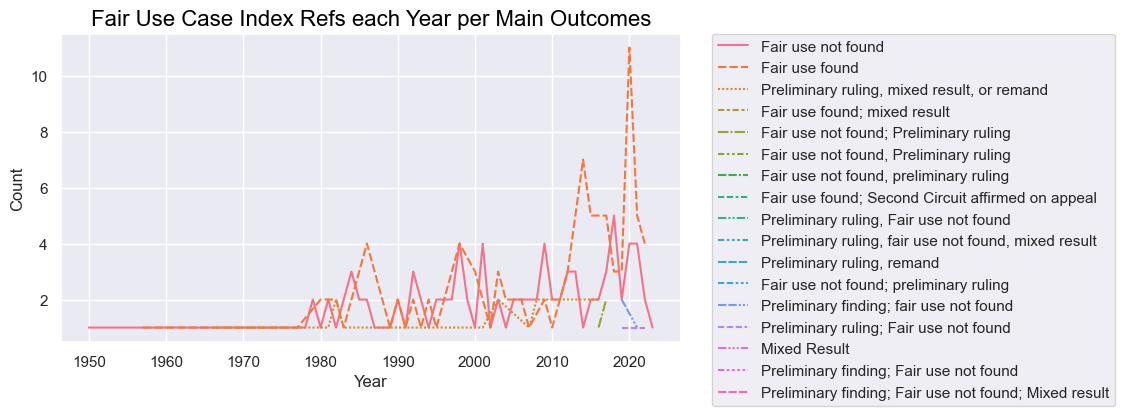

In [80]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Outcome']).size().reset_index(name='Count')
# filter for 1950 and later
df_counts = df_counts[df_counts['Year'] >= 1950]
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Year per Main Outcomes'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Outcome', style='Outcome').set_title(title, fontsize=16, color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

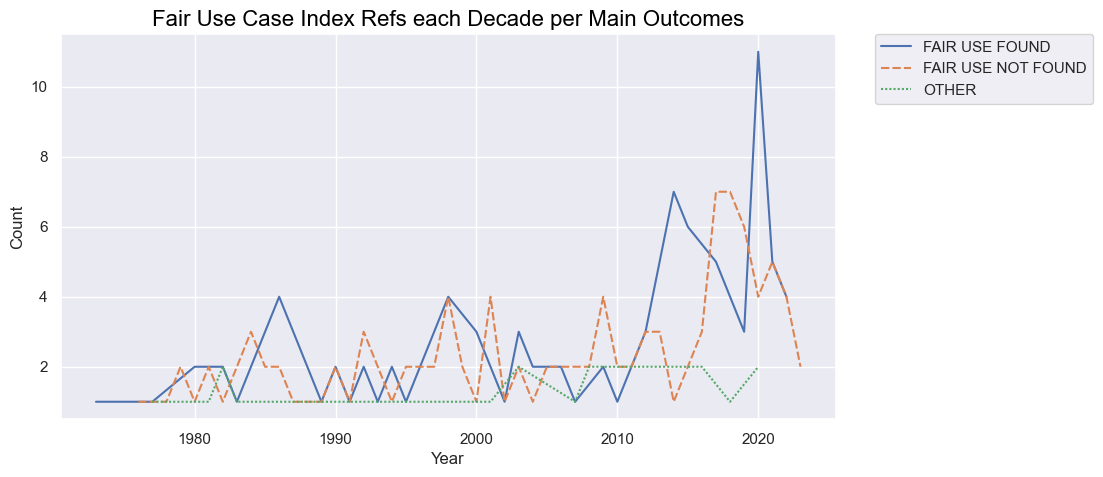

In [81]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Main Outcome']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Main Outcomes'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Main Outcome', style='Main Outcome').set_title(title, fontsize=16, color='black')
# offset the legend so it's not covering the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Looking also at Courts & Outcomes

Text(0.5, 1.0, 'Fair Use Case Index Refs per Court')

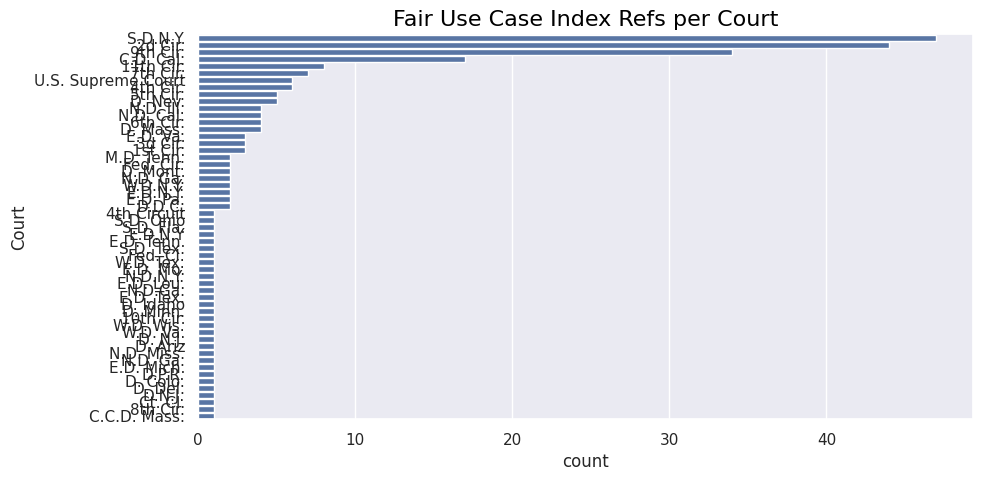

In [24]:
# sns plot on court counts
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs per Court'
sns.countplot(y='Court', data=df, order=df['Court'].value_counts().index).set_title(title, fontsize=16, color='black')

Text(0.5, 1.0, 'Fair Use Case Index Refs per Category')

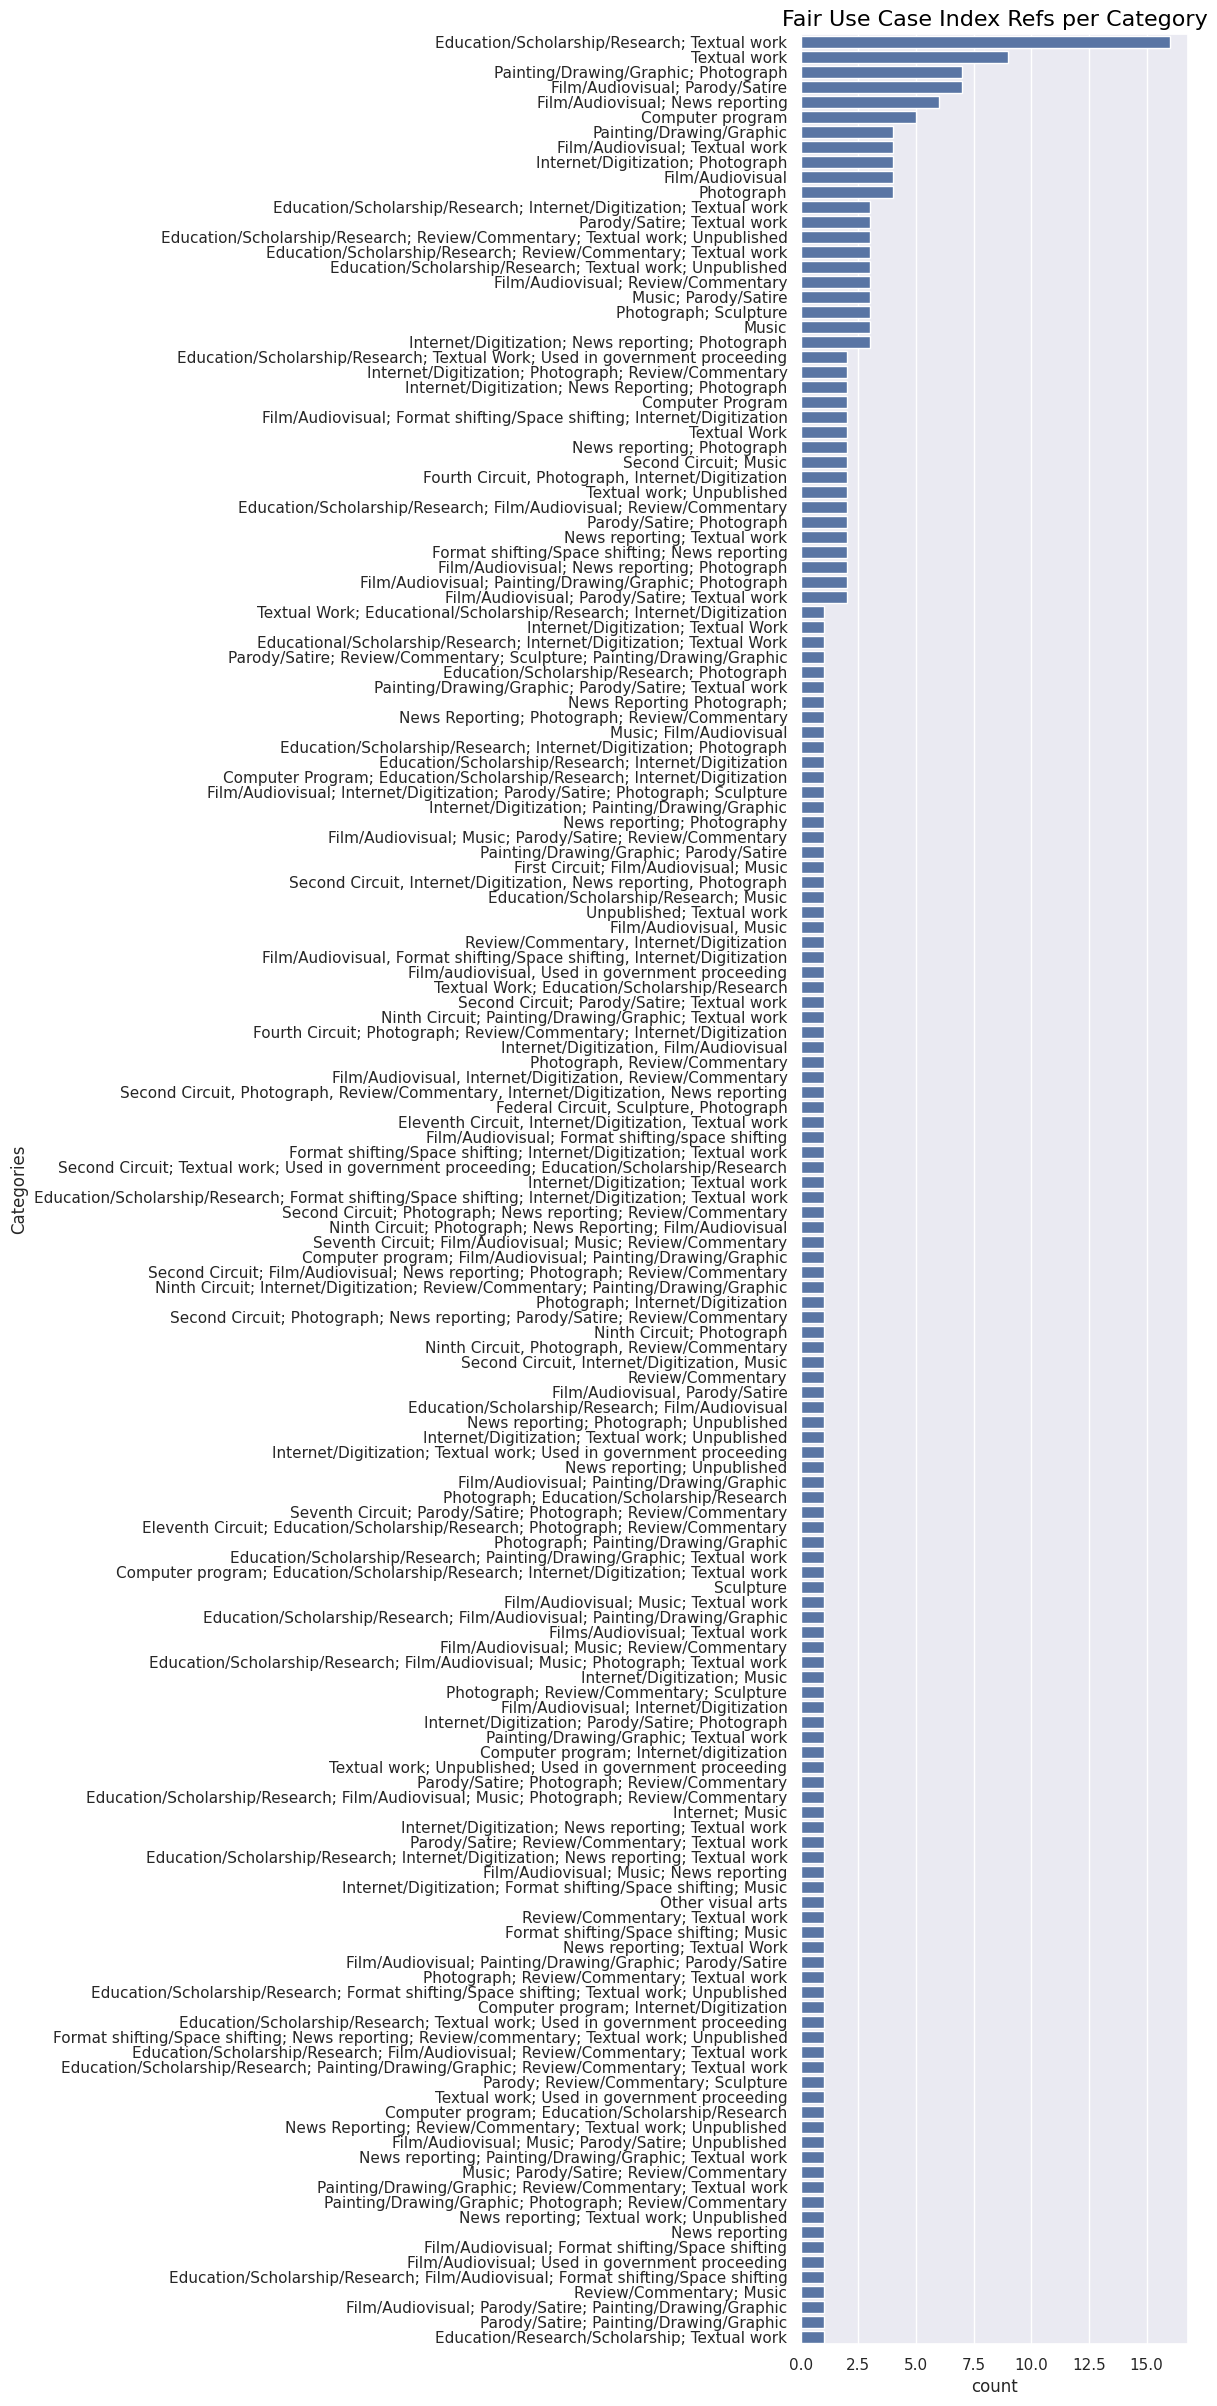

In [25]:
# sns plot on Categories
sns.set(rc={'figure.figsize':(5,30)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs per Category'
sns.countplot(y='Categories', data=df, order=df['Categories'].value_counts().index).set_title(title, fontsize=16, color='black')

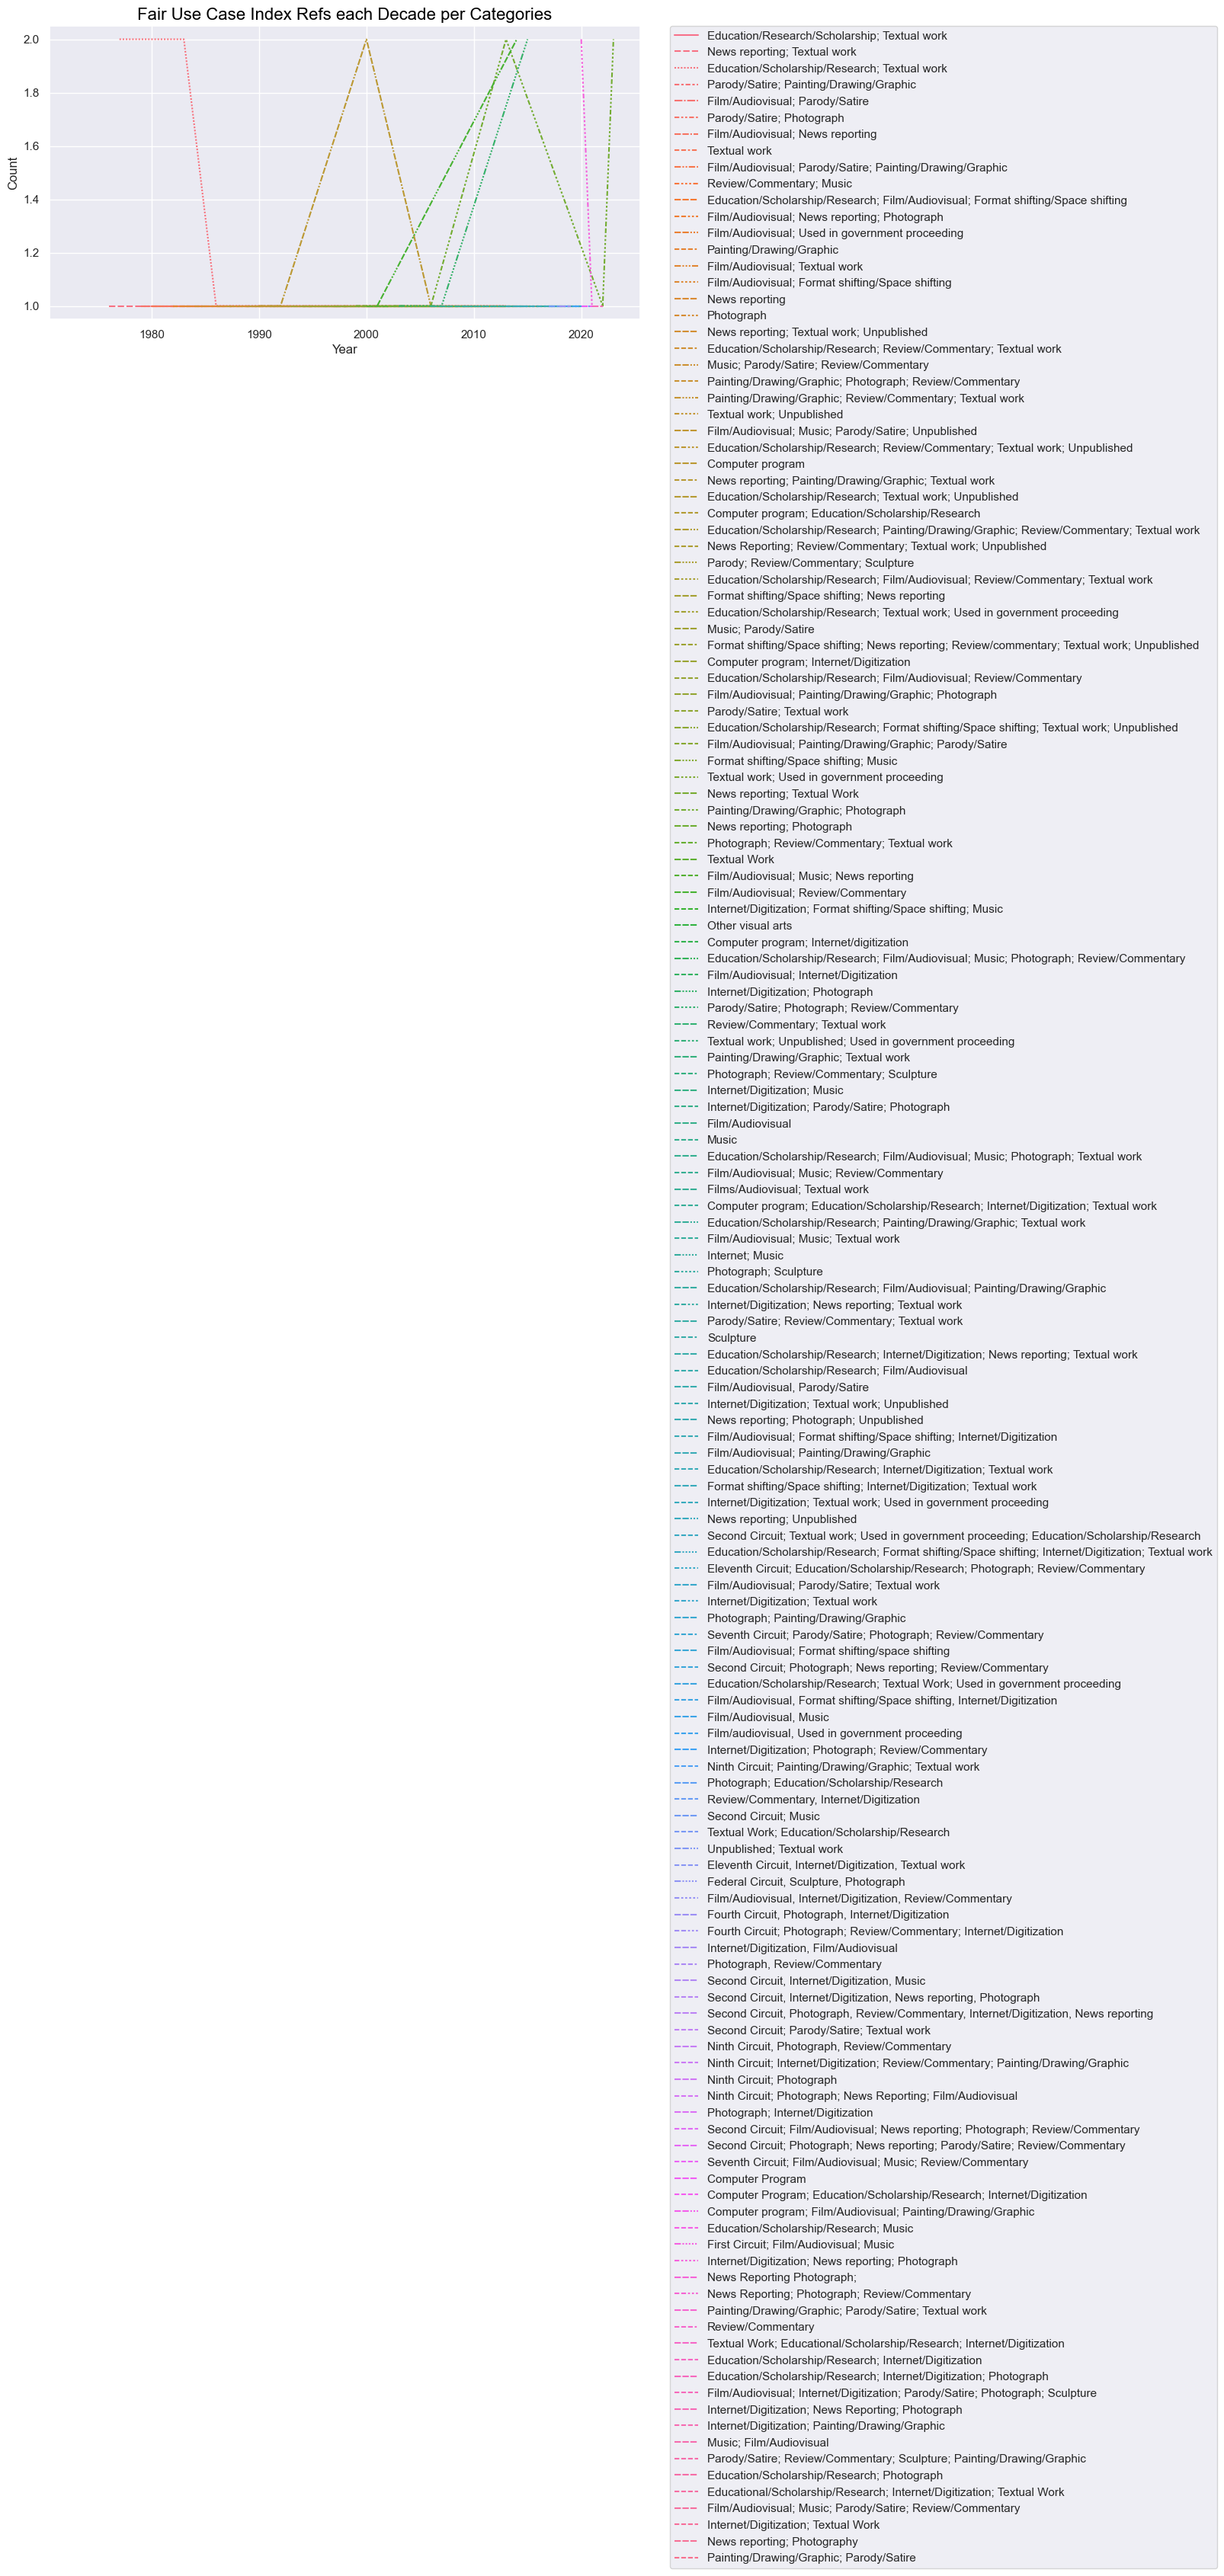

In [91]:
# sns plot on year value counts with hue as Main Outcome
# Count occurrences
df_counts = df.groupby(['Year', 'Categories']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
title='Fair Use Case Index Refs each Decade per Categories'
sns.lineplot(data=df_counts, x='Year', y='Count', hue='Categories', style='Categories').set_title(title, fontsize=16, color='black')
# offset the legend so it's not covering the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Using AI to assist in Category classification to simplify & summarize

- TBD on this step!

In [ ]:
## okay so maybe it's too many categories
# probably need to filter using AI or something to group them into fewer categories
# let's try to group them into fewer categories
# Count occurrences
df_counts = df.groupby(['Year', 'Categories']).size().reset_index(name='Count')
# filter where year >= 1950
df_counts = df_counts[df_counts['Year'] >= 1970]
df_counts
# let's pass each category to a function that will return openai filtered categories
# let's use the openai API to filter the categories
import openai
import os
openai.api_key = 'sk-proj-...'
# let's try to use the openai API to filter the categories
def filter_categories(category):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant. Help me process all the Fair Use Index categories into fewer categories."},
            {"role": "user", "content": category},
        ]
    )
    return response.choices[0].message['content']


In [112]:
filtered_categories = []
for category in df_counts['Categories'].unique():
    filtered_category = filter_categories(category)
    filtered_categories.append(filtered_category)
    print(f'{category} -> {filtered_category}')

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}